In [64]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [65]:
aal = pd.read_csv("AAL.csv")
# dis = pd.read_csv("DIS.csv")
# pep = pd.read_csv("PEP.csv")

In [66]:
aal.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,daily_returns,std_10,...,CMO_252,TR_10,ATR_10,NATR_10,TR_45,ATR_45,NATR_45,TR_252,ATR_252,NATR_252
0,2010-01-04,4.562868,4.657142,4.393175,4.496876,9837300,0.0,0,-1.446312,4.866371,...,NaN,0.263968,0.296964,6.603778,0.263968,0.245113,5.450736,0.263968,0.360374,8.013879
1,2010-01-05,4.515732,5.062522,4.440312,5.005957,25212000,0.0,0,11.320767,5.856243,...,-7.191102,0.622209,0.329960,6.591340,0.622209,0.255588,5.105672,0.622209,0.361235,7.216095
2,2010-01-06,4.892829,5.071950,4.713708,4.798555,16597900,0.0,0,-4.143108,6.147385,...,-5.942541,0.358242,0.349757,7.288804,0.358242,0.257264,5.361276,0.358242,0.358616,7.473415
3,2010-01-07,4.770272,5.119086,4.760845,4.939965,14033400,0.0,0,2.946936,5.043731,...,-7.891070,0.358241,0.328074,6.641222,0.358241,0.258730,5.237491,0.358241,0.357007,7.226919
4,2010-01-08,4.968247,5.119085,4.770271,4.845690,12760000,0.0,0,-1.908414,5.088172,...,-7.613001,0.348814,0.332788,6.867707,0.348814,0.262501,5.417210,0.348814,0.354463,7.315023


In [67]:
aal['Hl_pct'] = 100*(aal['High'].shift(1)-aal['Low'].shift(1))/aal['Close'].shift(1)
#aal['pct_change'] = 100*(aal['Close']- aal['Open'])/aal['Open']
aal1=aal.drop(['Open', 'High', 'Low'], axis=1)
aal1

,Date,Close,Volume,Dividends,Stock Splits,daily_returns,std_10,std_45,std_252,market_daily_returns,...,TR_10,ATR_10,NATR_10,TR_45,ATR_45,NATR_45,TR_252,ATR_252,NATR_252,Hl_pct
0,2010-01-04,4.496876,9837300,0.0,0,-1.446312,4.866371,4.511461,6.823274,1.604342,...,0.263968,0.296964,6.603778,0.263968,0.245113,5.450736,0.263968,0.360374,8.013879,NaN
1,2010-01-05,5.005957,25212000,0.0,0,11.320767,5.856243,4.760809,6.860207,0.311568,...,0.622209,0.329960,6.591340,0.622209,0.255588,5.105672,0.622209,0.361235,7.216095,5.870025
2,2010-01-06,4.798555,16597900,0.0,0,-4.143108,6.147385,4.746507,6.843106,0.054552,...,0.358242,0.349757,7.288804,0.358242,0.257264,5.361276,0.358242,0.358616,7.473415,12.429376
3,2010-01-07,4.939965,14033400,0.0,0,2.946936,5.043731,4.658922,6.845602,0.400120,...,0.358241,0.328074,6.641222,0.358241,0.258730,5.237491,0.358241,0.357007,7.226919,7.465621
4,2010-01-08,4.845690,12760000,0.0,0,-1.908414,5.088172,4.684184,6.838192,0.288173,...,0.348814,0.332788,6.867707,0.348814,0.262501,5.417210,0.348814,0.354463,7.315023,7.251902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2894,2021-07-02,21.480000,20814100,0.0,0,-0.139473,1.525176,2.137848,3.586904,0.750008,...,0.539999,0.558000,2.597764,0.539999,0.768889,3.579557,0.539999,0.873810,4.068015,2.138545
2895,2021-07-06,21.010000,24176500,0.0,0,-2.188079,1.573314,2.142391,3.587733,-0.202186,...,0.930000,0.587000,2.793907,0.930000,0.771778,3.673383,0.930000,0.874683,4.163172,2.513962
2896,2021-07-07,20.309999,30857000,0.0,0,-3.331750,1.776203,2.190119,3.565914,0.335898,...,0.879999,0.615000,3.028064,0.879999,0.777778,3.829531,0.879999,0.874643,4.306464,4.426465
2897,2021-07-08,20.350000,28539300,0.0,0,0.196952,1.761107,2.163158,3.565828,-0.856102,...,0.980000,0.687000,3.375920,0.980000,0.776222,3.814359,0.980000,0.875952,4.304434,4.332837


In [68]:
aal1 = aal.set_index("Date")
aal1.index = pd.to_datetime(aal1.index)

In [69]:
print(len(aal1.columns))
aal1.dropna(inplace=True)
aal1 = aal1.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
def get_VIF(df, target):
    X = add_constant(df.loc[:, df.columns != target])
    res = pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns,)
    return res
target = 'Close'
g_all=get_VIF(aal1, target).to_frame()
g_all
g=g_all[~g_all.isin([np.nan, np.inf, -np.inf]).any(1)]
g.columns = ['VIF']
g= g[g['VIF']<100]
g.reset_index
c=list(g.index.values)
#aal1=aal1[c]
#c.remove('const')
c.append('Close')
aal1 = aal1[c]
print(len(aal1.columns))
g

73


C:\Users\Kinjal\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\Kinjal\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\Kinjal\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


39


,VIF
Volume,5.257255
Dividends,1.021191
daily_returns,3.413068
std_10,10.079842
std_45,31.187553
market_daily_returns,1.378486
beta,4.792816
ER_10,48.113934
ROC_10,8.460415
RSI_10,19.208203


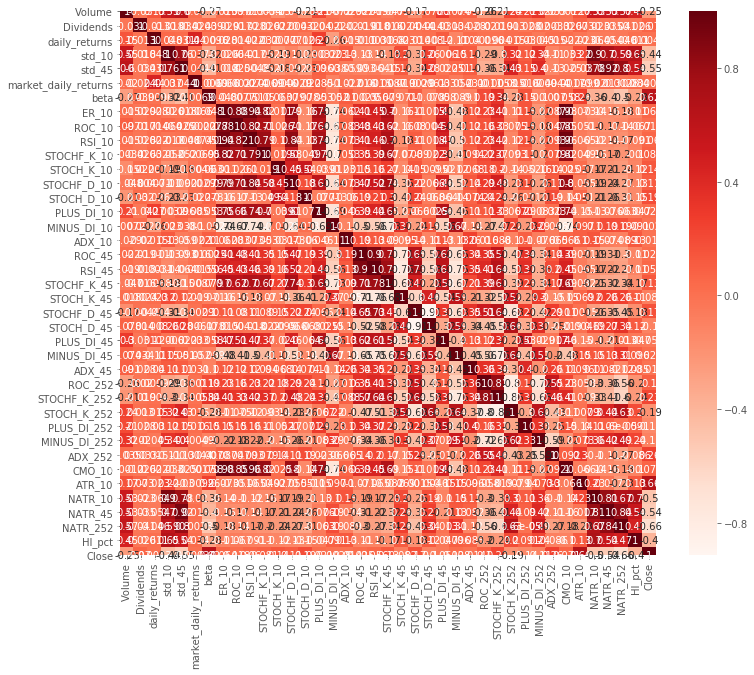

In [70]:
# https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = aal1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [71]:
aal1

,Volume,Dividends,daily_returns,std_10,std_45,market_daily_returns,beta,ER_10,ROC_10,RSI_10,...,PLUS_DI_252,MINUS_DI_252,ADX_252,CMO_10,ATR_10,NATR_10,NATR_45,NATR_252,Hl_pct,Close
Date,,,,,,,,,,,,,,,,,,,,,
2011-01-04,5374700,0.0,-0.281680,2.932209,2.437677,-0.131306,1.370014,0.181538,0.058648,62.335145,...,23.258531,20.160517,4.891607,27.441898,0.317703,3.173252,3.636744,4.257839,5.915494,10.011914
2011-01-05,8735800,0.0,4.519781,3.080849,2.532754,0.500717,1.372820,0.134146,0.043222,63.521909,...,23.616369,20.006714,4.905607,21.359240,0.351642,3.360358,3.547547,4.086229,3.389827,10.464431
2011-01-06,4464100,0.0,1.261261,2.957699,2.516760,-0.212296,1.370551,0.163381,0.055133,68.410290,...,23.539143,19.941292,4.926540,26.363809,0.341272,3.220638,3.475682,4.030037,5.585593,10.596415
2011-01-07,4367100,0.0,1.423481,2.412662,2.518904,-0.184478,1.371301,0.267442,0.089147,65.523739,...,23.516568,19.862236,4.947301,42.990866,0.319589,2.973681,3.436647,3.971039,2.046259,10.747252
2011-01-10,4006900,0.0,0.614039,2.347013,2.440689,-0.137633,1.371762,0.464174,0.150353,73.321077,...,23.566516,19.767950,4.968817,78.836062,0.336558,3.112465,3.338176,3.947496,2.631572,10.813245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-02,20814100,0.0,-0.139473,1.525176,2.137848,0.750008,1.131294,-0.134831,-0.032389,29.275067,...,30.492983,27.879101,5.365016,-28.799951,0.558000,2.597764,3.579557,4.068015,2.138545,21.480000
2021-07-06,24176500,0.0,-2.188079,1.573314,2.142391,-0.202186,1.140285,-0.153993,-0.036339,35.598310,...,30.405181,27.854174,5.361494,-32.793562,0.587000,2.793907,3.673383,4.163172,2.513962,21.010000
2021-07-07,30857000,0.0,-3.331750,1.776203,2.190119,0.335898,1.107873,-0.259460,-0.064143,28.509422,...,30.285899,28.057954,5.357585,-51.798568,0.615000,3.028064,3.829531,4.306464,4.426465,20.309999


In [72]:
#Correlation with output variable
cor_target = abs(cor["Close"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
rel_feat = pd.DataFrame(relevant_features.index)
rel_feat.columns = ["sel_col"]

In [73]:
aal_df = aal1[rel_feat["sel_col"]]
# aal_df['Date']=aal1['Date']

In [74]:
print(len(aal1.columns), len(rel_feat))

39 12


In [75]:
#aal_df = aal1.copy()

In [76]:
#aal_df=aal_df.drop(['Typical Price'], axis=1)

In [77]:
aal_close_px = aal_df['Close']

In [78]:
# https://towardsdatascience.com/in-12-minutes-stocks-analysis-with-pandas-and-scikit-learn-a8d8a7b50ee7
mavg = aal_close_px.rolling(window=100).mean()


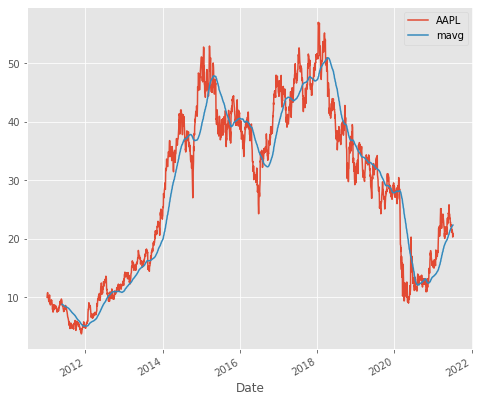

In [79]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

aal_close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

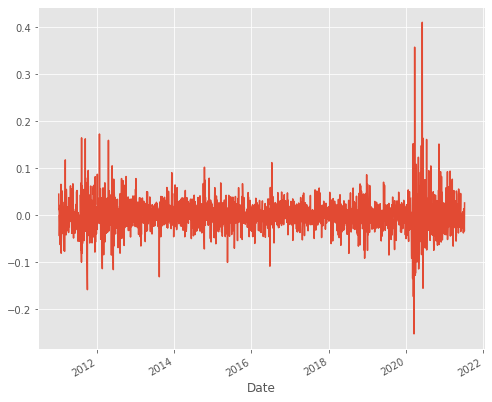

In [80]:
rets = aal_close_px/aal_close_px.shift(1) - 1
rets.plot(label='return')

In [105]:
aal_df['prev_day'] = aal_df['Close'].shift(1)

In [106]:
aal_df = aal_df.iloc[1:]

In [107]:
# aal_df = aal_df.set_index("Date")

In [108]:
# aal_df = aal_df.set_index("Date")
# aal_df.index = pd.to_datetime(aal_df.index)
# aal_df.index[0]

In [109]:
# print(len(aal_df.columns))
# aal_df.fillna(value=-99999, inplace=True)
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from statsmodels.tools.tools import add_constant
# def get_VIF(df, target):
#     X = add_constant(df.loc[:, df.columns != target])
#     res = pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns,)
#     return res
# target = 'Close'
# g_all=get_VIF(aal_df, target).to_frame()
# g_all
# g=g_all[~g_all.isin([np.nan, np.inf, -np.inf]).any(1)]
# g.reset_index
# c=list(g.index.values)
# #aal_df=aal_df[c]
# c.remove('const')
# c.append('Close')
# aal_df = aal_df[c]
# print(len(aal_df.columns))
# g

In [110]:
# g_all

In [111]:
# aal = aal[['Volume', 'std_45', 'PLUS_DI_252', 'std_252', 'prev_day',
#        'residual_volatility', 'MINUS_DI_252',"Close"]]
# aal_df = aal.copy()

In [112]:
# training test split
key = pd.Timestamp(2016, 12, 29)
key2 = pd.Timestamp(2019, 12, 31)

train = aal_df[aal_df.index<=key].copy()
test = aal_df[(aal_df.index<=key2) & (aal_df.index>key)].copy()
col = set(train.columns)
col.remove("Close")
xtrain = train[col]
ytrain = train["Close"]
xtest = test[col]
ytest = test["Close"]

In [113]:
aal_df = aal_df.iloc[1:,:]
#aal_df.drop(['Open', 'High',"Low"], axis=1, inplace = True)
aal_df

,Volume,std_10,std_45,beta,STOCHF_K_252,ADX_252,ATR_10,NATR_10,NATR_45,NATR_252,Hl_pct,Close,prev_day
Date,,,,,,,,,,,,,
2011-01-10,4006900,2.347013,2.440689,1.371762,88.960204,4.968817,0.336558,3.112465,3.338176,3.947496,2.631572,10.813245,10.747252
2011-01-11,6168400,2.990480,2.526070,1.376454,89.858799,4.992222,0.384638,3.719230,3.579458,4.145866,2.702706,10.341875,10.813245
2011-01-12,5974600,2.997996,2.491223,1.358957,83.440326,5.008021,0.376154,3.667277,3.533496,4.170678,6.107558,10.257028,10.341875
2011-01-13,2383500,2.992626,2.470655,1.358209,82.284989,5.023386,0.379925,3.700641,3.473114,4.164662,2.022061,10.266455,10.257028
2011-01-14,2627800,2.974472,2.457519,1.357740,82.413354,5.039409,0.372383,3.660795,3.449695,4.194065,2.203855,10.172181,10.266455
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-02,20814100,1.525176,2.137848,1.131294,70.375162,5.365016,0.558000,2.597764,3.579557,4.068015,2.138545,21.480000,21.510000
2021-07-06,24176500,1.573314,2.142391,1.140285,70.181109,5.361494,0.587000,2.793907,3.673383,4.163172,2.513962,21.010000,21.480000
2021-07-07,30857000,1.776203,2.190119,1.107873,67.141010,5.357585,0.615000,3.028064,3.829531,4.306464,4.426465,20.309999,21.010000


In [114]:
 #!pip install -U statsmodels
#!pip install -U pandas


In [115]:
# # predicting stock prices, feature engineering

# aal_dfreg = aal[['Close', 'Volume']]
# aal_dfreg['HL_PCT'] = (aal['High'] - aal['Low'])/aal['Close'] * 100.0
# aal_dfreg['PCT_change'] = (aal['Close'] - aal['Open'])/aal['Open'] * 100.0
# aal_dfreg

In [116]:
# import math
# from sklearn import preprocessing
# # Drop missing value
# aal_df.fillna(value=-99999, inplace=True)
# # We want to separate 1 percent of the data to forecast
# forecast_out = int(math.ceil(0.1 * len(aal_df)))
# # Separating the label here, we want to predict the AdjClose
# forecast_col = 'Close'
# aal_dfreg['label'] = aal_dfreg[forecast_col].shift(-forecast_out)
# X = np.array(aal_dfreg.drop(['label'], 1))
# # Scale the X so that everyone can have the same distribution for linear regression
# X = preprocessing.scale(X)
# # Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
# X_lately = X[-forecast_out:]
# X = X[:-forecast_out]
# # Separate label and identify it as y
# y = np.array(aal_dfreg['label'])
# y = y[:-forecast_out]

In [117]:
# # # model generation
xtrain.dropna(inplace=True)
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

C:\Users\Kinjal\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [118]:
cols = xtrain.columns
cols

Index(['Volume', 'ATR_10', 'STOCHF_K_252', 'prev_day', 'ADX_252', 'Hl_pct',
       'NATR_10', 'beta', 'std_10', 'NATR_45', 'std_45', 'NATR_252'],
      dtype='object')

In [119]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#xtrain = scaler.fit_transform(xtrain)
#xtest = scaler.transform(xtest)

In [120]:
xtrain

,Volume,ATR_10,STOCHF_K_252,prev_day,ADX_252,Hl_pct,NATR_10,beta,std_10,NATR_45,std_45,NATR_252
Date,,,,,,,,,,,,
2011-01-07,4367100,0.319589,86.906299,10.596415,4.947301,2.046259,2.973681,1.371301,2.412662,3.436647,2.518904,3.971039
2011-01-10,4006900,0.336558,88.960204,10.747252,4.968817,2.631572,3.112465,1.371762,2.347013,3.338176,2.440689,3.947496
2011-01-11,6168400,0.384638,89.858799,10.813245,4.992222,2.702706,3.719230,1.376454,2.990480,3.579458,2.526070,4.145866
2011-01-12,5974600,0.376154,83.440326,10.341875,5.008021,6.107558,3.667277,1.358957,2.997996,3.533496,2.491223,4.170678
2011-01-13,2383500,0.379925,82.284989,10.257028,5.023386,2.022061,3.700641,1.358209,2.992626,3.473114,2.470655,4.164662
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-22,3618700,1.336437,95.487268,47.804504,6.187725,1.354360,2.840415,2.355736,2.084010,2.492093,1.687380,2.460701
2016-12-23,2914800,1.139305,92.478789,47.050770,6.175874,2.033275,2.431926,2.358171,1.765809,2.458601,1.690442,2.467120
2016-12-27,2797800,1.002086,91.668776,46.847832,6.163608,1.134487,2.133302,2.356329,1.110462,2.444819,1.659660,2.457767


In [121]:
#xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.33, random_state=42)
# Linear regression
from sklearn import linear_model
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(xtrain, ytrain)
# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(xtrain, ytrain)

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(xtrain, ytrain)
clflass = linear_model.Lasso(alpha=0.1)
clflass.fit(xtrain, ytrain)

C:\Users\Kinjal\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.578036e-33
  overwrite_a=True).T
C:\Users\Kinjal\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number4.253535e-50
  overwrite_a=True).T


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [122]:
# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(xtrain, ytrain)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=2, p=2,
          weights='uniform')

In [123]:
confidencereg = clfreg.score(xtest, ytest)
confidencepoly2 = clfpoly2.score(xtest,ytest)
confidencepoly3 = clfpoly3.score(xtest,ytest)
confidenceknn = clfknn.score(xtest, ytest)
print('The linear regression confidence is ', confidencereg)
print('The quadratic regression 2 confidence is ', confidencepoly2)
print('The quadratic regression 3 confidence is ', confidencepoly3)
print('The knn regression confidence is ', confidenceknn)
clflass.score(xtest, ytest)

The linear regression confidence is  0.9872105239760385
The quadratic regression 2 confidence is  0.951783929647119
The quadratic regression 3 confidence is  -2.331598405822203
The knn regression confidence is  -7.2546646799731445


0.988988428126087

In [124]:
forecast_set = clfreg.predict(xtest)
Forecast = pd.DataFrame()
Forecast['Forecast'] = np.nan
Forecast['Date']=aal_df.index
Forecast=Forecast.set_index('Date')

In [125]:
forecast_set
Forecast['Forecast']

Date
2011-01-10   NaN
2011-01-11   NaN
2011-01-12   NaN
2011-01-13   NaN
2011-01-14   NaN
              ..
2021-07-02   NaN
2021-07-06   NaN
2021-07-07   NaN
2021-07-08   NaN
2021-07-09   NaN
Name: Forecast, Length: 2642, dtype: float64

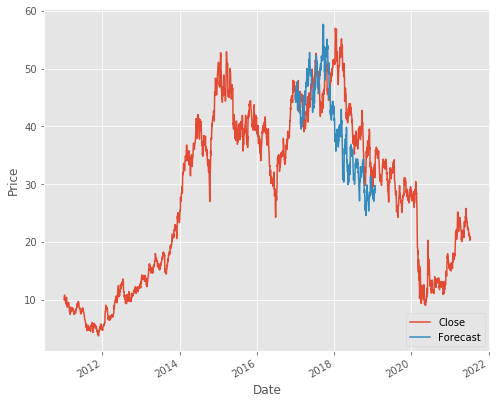

KeyError: 'Forecast'

In [126]:
# Plotting the prediction
from datetime import datetime, timedelta
last_date = key
last_unix = last_date
try:
    next_unix = last_unix + timedelta(days=1)
except:
    next_unix = timedelta(last_unix) + timedelta(days = 1)

for i in forecast_set:
    next_date = next_unix
    next_unix += timedelta(days=1)
    Forecast.loc[next_date] = [i]
aal1['Close'].plot()
Forecast['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()
aal_df['Forecast']

In [ ]:
print(next_unix)

In [ ]:
print(clfreg.coef_)

In [127]:
print(clfreg.intercept_)

1.7190548694399972


In [128]:
xtrain.columns

Index(['Volume', 'ATR_10', 'STOCHF_K_252', 'prev_day', 'ADX_252', 'Hl_pct',
       'NATR_10', 'beta', 'std_10', 'NATR_45', 'std_45', 'NATR_252'],
      dtype='object')

In [129]:
coeff = dict(zip(cols, clfreg.coef_))


In [130]:

coeff

{'Volume': -7.017590939765126e-09,
 'ATR_10': 0.6156249561850273,
 'STOCHF_K_252': -0.007325362952618618,
 'prev_day': 0.9681938803059924,
 'ADX_252': -0.014332952079312702,
 'Hl_pct': 0.014366291304926074,
 'NATR_10': -0.20674201027785666,
 'beta': 0.11806281352637704,
 'std_10': 0.06506323029168547,
 'NATR_45': -0.04031821239905026,
 'std_45': 0.2312957956073099,
 'NATR_252': -0.23574531702308255}

In [131]:
dict(sorted(coeff.items(), key=lambda item: abs(item[1]), reverse = True))

{'prev_day': 0.9681938803059924,
 'ATR_10': 0.6156249561850273,
 'NATR_252': -0.23574531702308255,
 'std_45': 0.2312957956073099,
 'NATR_10': -0.20674201027785666,
 'beta': 0.11806281352637704,
 'std_10': 0.06506323029168547,
 'NATR_45': -0.04031821239905026,
 'Hl_pct': 0.014366291304926074,
 'ADX_252': -0.014332952079312702,
 'STOCHF_K_252': -0.007325362952618618,
 'Volume': -7.017590939765126e-09}

In [132]:
aal_df

,Volume,std_10,std_45,beta,STOCHF_K_252,ADX_252,ATR_10,NATR_10,NATR_45,NATR_252,Hl_pct,Close,prev_day
Date,,,,,,,,,,,,,
2011-01-10,4006900,2.347013,2.440689,1.371762,88.960204,4.968817,0.336558,3.112465,3.338176,3.947496,2.631572,10.813245,10.747252
2011-01-11,6168400,2.990480,2.526070,1.376454,89.858799,4.992222,0.384638,3.719230,3.579458,4.145866,2.702706,10.341875,10.813245
2011-01-12,5974600,2.997996,2.491223,1.358957,83.440326,5.008021,0.376154,3.667277,3.533496,4.170678,6.107558,10.257028,10.341875
2011-01-13,2383500,2.992626,2.470655,1.358209,82.284989,5.023386,0.379925,3.700641,3.473114,4.164662,2.022061,10.266455,10.257028
2011-01-14,2627800,2.974472,2.457519,1.357740,82.413354,5.039409,0.372383,3.660795,3.449695,4.194065,2.203855,10.172181,10.266455
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-02,20814100,1.525176,2.137848,1.131294,70.375162,5.365016,0.558000,2.597764,3.579557,4.068015,2.138545,21.480000,21.510000
2021-07-06,24176500,1.573314,2.142391,1.140285,70.181109,5.361494,0.587000,2.793907,3.673383,4.163172,2.513962,21.010000,21.480000
2021-07-07,30857000,1.776203,2.190119,1.107873,67.141010,5.357585,0.615000,3.028064,3.829531,4.306464,4.426465,20.309999,21.010000


In [ ]:
xtrain.shape, ytrain.shape

In [ ]:
clfreg = LinearRegression()
clfreg.fit(xtrain, ytrain)

In [ ]:
clfreg.score(xtrain, ytrain)

In [ ]:
clfreg.score(xtest, ytest)

In [ ]:
ytrain